In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [281]:
titanic_df = pd.read_csv('./데이터/train.csv')
test_df = pd.read_csv('./데이터/test.csv')
sub_df = pd.read_csv('./데이터/gender_submission.csv')

In [282]:
titanic_df.drop('PassengerId',axis=1, inplace=True)
test_df.drop('PassengerId',axis=1, inplace=True)

In [283]:
titanic_df.info()

# 결측치 : age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [284]:
test_df.info()

# 결측치 : age, fare, cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [285]:
titanic_df['Title']=titanic_df['Name'].str.split(', ').str[1].str.split('.').str[0]

In [286]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [287]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Pclass에 대한 설명

pclass는 승객 등급을 의미 : 1, 2, 3 등급


- 부유한 승객들이 주로 타고 있었으며 급한 사정보다는 즐기려고 승선한 승객들이 많았다.  
- 중산층 승객들이 주로 타고 있었다.
- 가난한 승객들이 주로 타고 있었으며 영국뿐만 아니라 세계 각지에서 아메리칸 드림으로 미국에서 새로운 보금자리를 얻기 위해 이주 목적으로 승선한 승객들이 많았다.

In [288]:
titanic_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [289]:
a = pd.DataFrame(titanic_df['Pclass'].value_counts())
a

,count
Pclass,
3,491
1,216
2,184


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

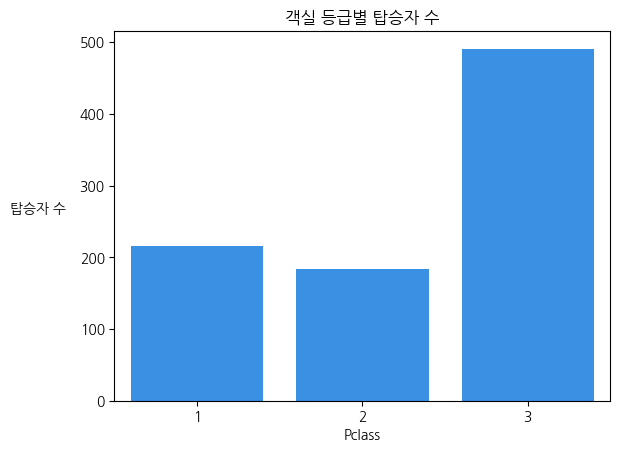

In [290]:

sns.barplot(data=a, x=a.index, y='count', color='dodgerblue')
plt.title('객실 등급별 탑승자 수')
plt.ylabel('탑승자 수',rotation=0, labelpad=30)
plt.xticks(rotation=0)

In [291]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


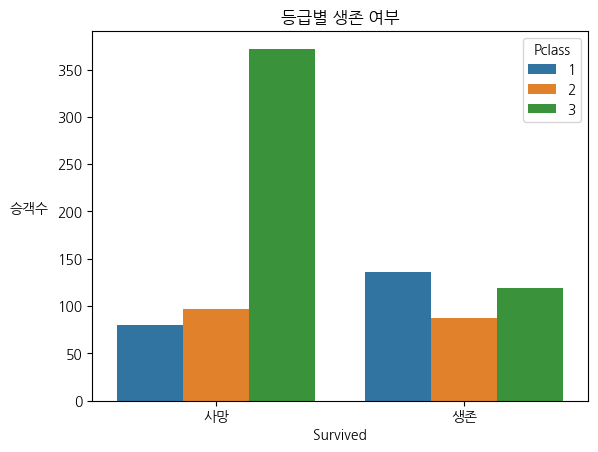

In [292]:
ax = sns.countplot(data=titanic_df, x='Survived', hue = 'Pclass')
ax.set_xticklabels(['사망', '생존'])
plt.title('등급별 생존 여부')
plt.ylabel('승객수',rotation = 0, labelpad=20)
plt.show()

In [293]:
titanic_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [294]:
titanic_df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [295]:
survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

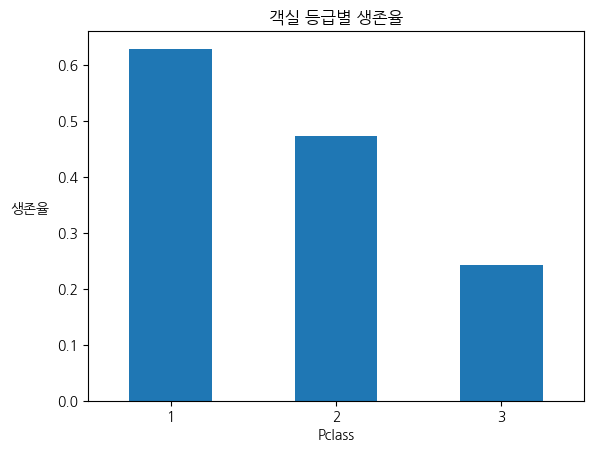

In [296]:
survival_rate.plot(kind = 'bar')
plt.title('객실 등급별 생존율')
plt.ylabel('생존율', rotation = 0, labelpad=20)
plt.xticks(rotation = 0)

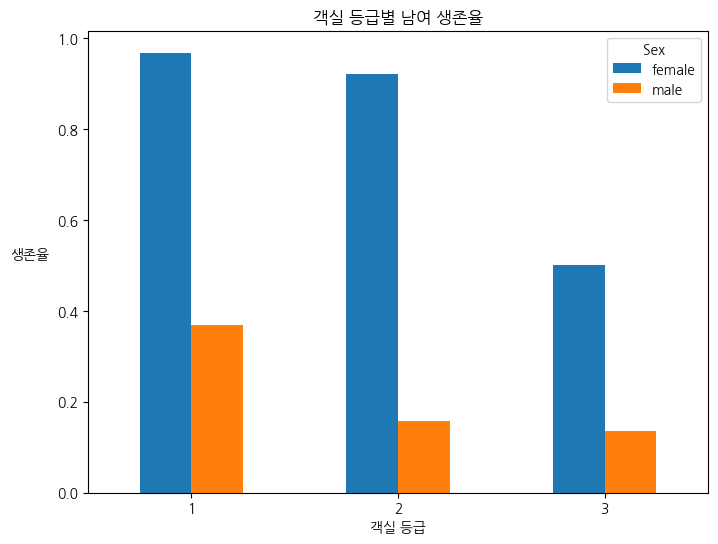

In [304]:
data = pd.read_csv('./데이터/train.csv')

# 등급과 성별로 그룹화하여 생존율 계산
grouped = data.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 등급과 성별을 기준으로 막대 그래프 그리기
grouped.pivot(index='Pclass', columns='Sex', values='Survived').plot(kind='bar', ax=ax)

# 그래프 레이블과 제목 설정
plt.title('객실 등급별 남여 생존율')
plt.ylabel('생존율', rotation=0, labelpad=20)
plt.xlabel('객실 등급')
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

In [234]:
embarked_counts = titanic_df.groupby('Pclass')['Embarked'].value_counts()
embarked_counts = pd.DataFrame(embarked_counts)
embarked_counts




count
Pclass Embarked       
1      S           127
       C            85
       Q             2
2      S           164
       C            17
       Q             3
3      S           353
       Q            72
       C            66

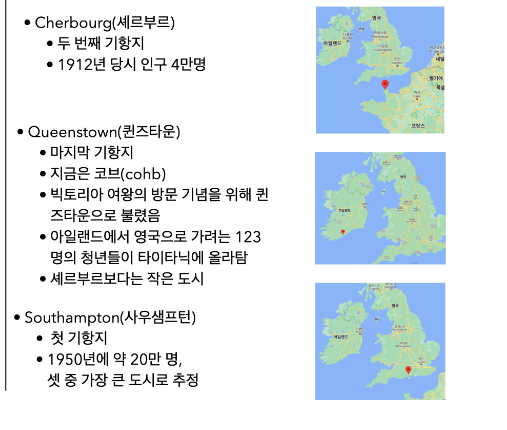

- 왜 퀸즈타운에는 3등급 객실 고객이 많을까?  
    아일랜드에서 뉴욕임!!! 아무튼 아일랜드에서 뉴욕으로 가려는 123명의 청년들이 타이타닉에 올라탔고 이 청년들은 아메리칸 드림을 꿈꾸는 청년들이이다. 대부분이 3등급 객실이다.   
  
- 따라서, pclass, embarked 모두 생존에 중요한 요소라 생각함

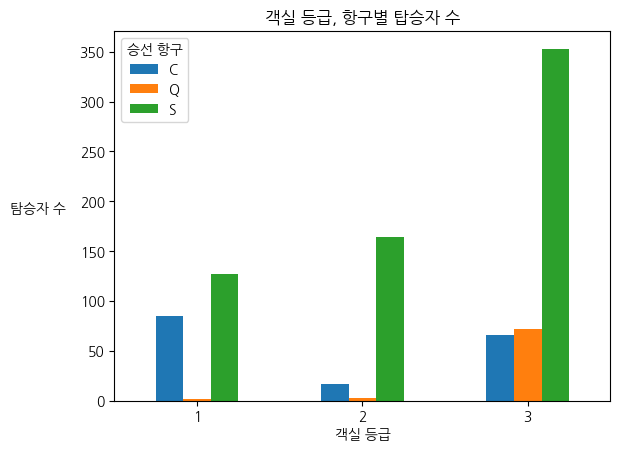

In [306]:
embarked_counts.unstack().plot(kind='bar')
plt.xlabel('객실 등급')
plt.xticks(rotation = 0)
plt.ylabel('탐승자 수', rotation = 0, labelpad=30)
plt.title('객실 등급, 항구별 탑승자 수')
plt.legend(title='승선 항구', labels = ['C','Q','S'])
plt.show()

---

# Name 에 대한 설명

- 'Mr': 남성 성인을 나타내는 호칭
- 'Mrs': 기혼 여성을 나타내는 호칭.
- 'Miss': 미혼 여성을 나타내는 호칭
- 'Master': 남자 아이를 나타내는 호칭.
- 'Don': 남성을 위한 명예직을 나타내는 호칭, 스페인 귀족 중 한 명으로 사회적으로 높은 지위를 가짐
- 'Rev': 목사를 나타내는 호칭
- 'Dr': 의사를 나타내는 호칭.
- 'Mme': 기혼 여성을 나타내는 호칭, 'Madame'의 축약형
- 'Ms': 여성의 결혼 여부를 알 수 없는 경우 사용되는 호칭
- 'Major': 군인 중 대령 이상의 계급을 나타내는 호칭
- 'Lady': 귀족 여성을 나타내는 호칭
- 'Sir': 귀족 남성을 나타내는 호칭
- 'Mlle': 미혼 여성을 나타내는 호칭, 'Mademoiselle'의 축약형
- 'Col': 군인 중 대령을 나타내는 호칭
- 'Capt': 군인 중 대위 이상의 계급을 나타내는 호칭
- 'the Countess': 백작 부인을 나타내는 호칭
- 'Jonkheer': 귀족 계급 중 하나인 남성을 나타내는 호칭

In [236]:
titanic_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [237]:
titanic_df['Title'].value_counts()

# 사회적 지위가 높은 사람은 어떤 호칭을 쓰고 있으며, 과연 그 사람들은 생존율이 높은가?(관계가 있는가?)
    # 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'
# 그렇다면 어떻게 분류를 해야할까?

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

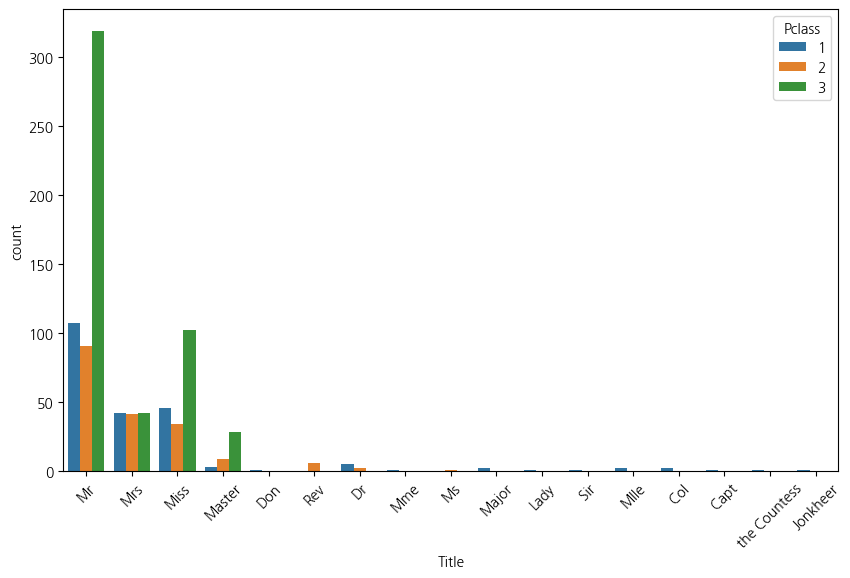

In [238]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Title', hue = 'Pclass')
plt.xticks(rotation=45)
plt.show()

In [239]:
target_list = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer']
filtered_df =titanic_df[titanic_df['Title'].isin(target_list)]

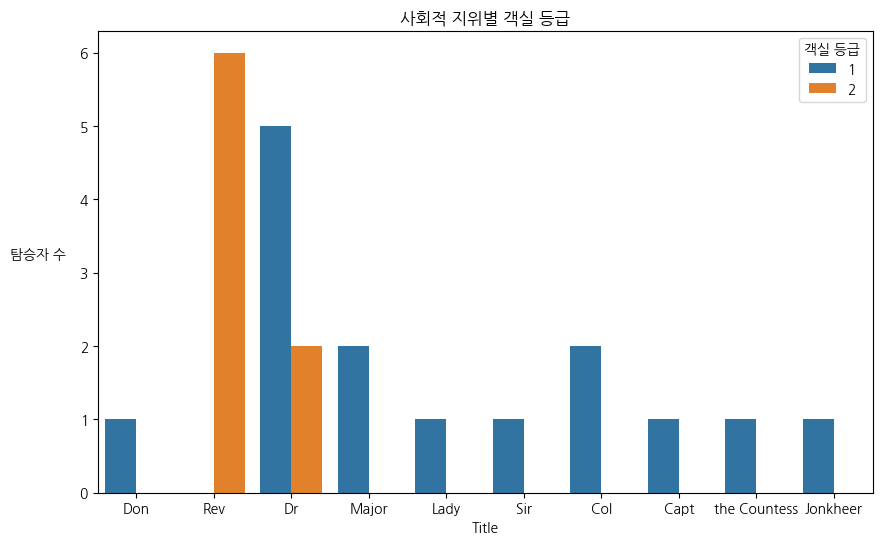

In [314]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Title', hue = 'Pclass')
plt.title('사회적 지위별 객실 등급')
plt.ylabel('탐승자 수', rotation = 0, labelpad=30)
plt.xticks(rotation=0)
plt.legend(title='객실 등급', labels = ['1','2','3'])
plt.show()

# 사회적 지위가 높은 사람들의 객실 등급을 살펴본 결과, 3등급 객실은 없었음.

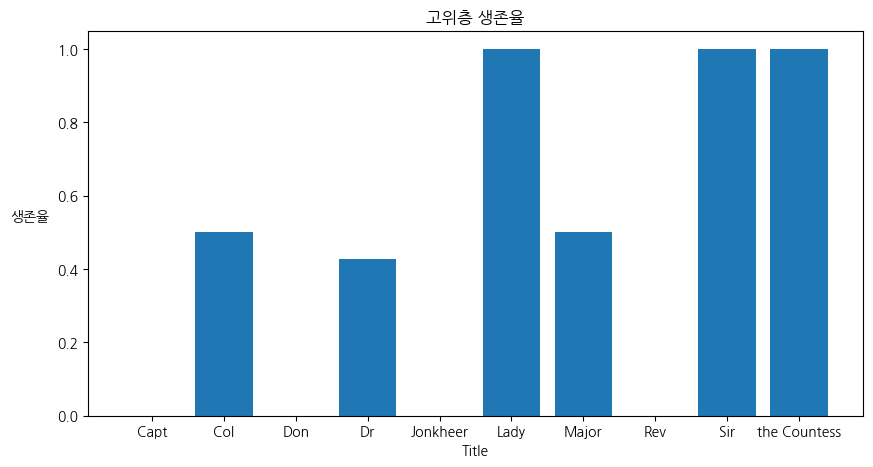

In [316]:
a = filtered_df.groupby('Title')['Survived'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(a['Title'], a['Survived'])
plt.title('고위층 생존율')
plt.ylabel('생존율', rotation = 0, labelpad=20)
plt.xlabel('Title')
plt.show()

In [241]:
a = pd.DataFrame(filtered_df['Survived'].value_counts())
a

,count
Survived,
0,15
1,8


In [242]:
filtered_df['Survived'].value_counts()

Survived
0    15
1     8
Name: count, dtype: int64

In [243]:
b = pd.DataFrame(titanic_df['Survived'].value_counts())
b

,count
Survived,
0,549
1,342


In [244]:
342/891*100

38.38383838383838

In [245]:
8/23*100

34.78260869565217

In [246]:
# 타이타닉 호의 전체 생존율은 38%, 사회적 지위가 높은 사람의 생존율은 34%로 생존율이 비슷함
# 왜? 그랬을까?
# 마지막임을 직감하고 시가와 와인을 마시며 최후를 맞이했다 함

# 결과 : 고위 직책과 생존율은 관련성이 없어보임

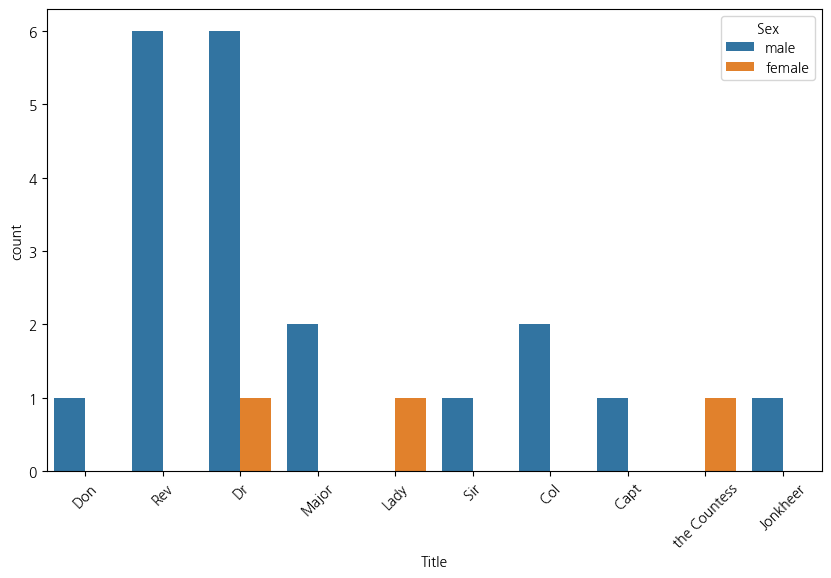

In [247]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Title', hue = 'Sex')
plt.xticks(rotation=45)
plt.show()

In [248]:
titanic_df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [249]:
titanic_df[titanic_df['Pclass']==1]['Fare']

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

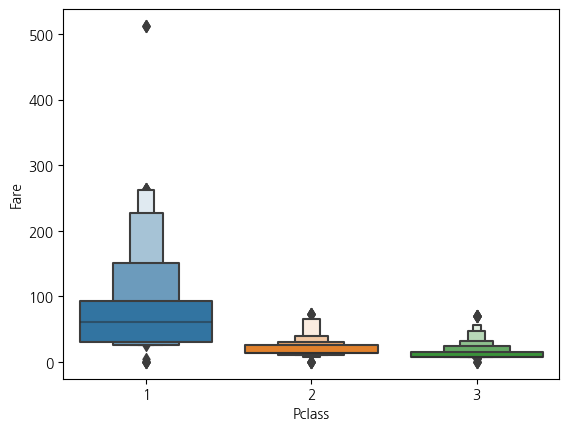

In [250]:
sns.boxenplot(data=titanic_df,x='Pclass', y='Fare')

---

- name을 drop, title을 drop 한 데이터프레임 비교하기  
    그러나, name이 인코딩이 안됨
- drop 후, title을 묶은 것(mr, mrs, miss, master, other)과 안 묶은 것을 비교하기  
    random forest로 성능을 비교한 결과,  
    안 묶은 것의 val set의 정확도가 약 0.2로 높았고 test와 val set의 정확도 차이도 더 적었음  
    따라서, 안 묶는 것으로 결정!!!!

In [251]:
titanic_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [252]:
titanic_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

In [253]:
titanic_df_grouptitle = titanic_df.copy()

In [254]:
titanic_df_notgroup = titanic_df.copy()

In [255]:
titanic_df_sex = titanic_df.copy()

In [256]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [257]:
titanic_df_grouptitle['Title'] = np.where((titanic_df_grouptitle['Title']=='Mr') | (titanic_df_grouptitle['Title']=='Mrs') | 
                                          (titanic_df_grouptitle['Title']=='Miss') 
                              | (titanic_df_grouptitle['Title']=='Master'), titanic_df_grouptitle['Title'], 'Other')

In [258]:
titanic_df_grouptitle

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Other
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [259]:
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Sex','Ticket','Embarked','Title']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])

In [260]:
change_object(titanic_df_grouptitle)
change_object(titanic_df_notgroup)

In [261]:
titanic_df_grouptitle['Age'].fillna(titanic_df_grouptitle['Age'].mean(), inplace=True)

In [262]:
titanic_df_notgroup['Age'].fillna(titanic_df_notgroup['Age'].mean(), inplace=True)

In [263]:
from sklearn.model_selection import train_test_split
x_train1, x_val1, y_train1, y_val1 = train_test_split(titanic_df_notgroup.drop('Survived', axis=1), 
                                                      titanic_df_notgroup['Survived'],
                                                     test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(titanic_df_grouptitle.drop('Survived', axis=1), 
                                                      titanic_df_grouptitle['Survived'],
                                                     test_size=0.2, random_state=42)

In [264]:
from sklearn.ensemble import RandomForestClassifier
titanic_df_notgroup = titanic_df_notgroup.dropna()
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train1, y_train1)

pred_train1 = dt.predict(x_train1)
pred_val1 = dt.predict(x_val1)
from sklearn.metrics import accuracy_score
accuracy_score(y_train1,pred_train1), accuracy_score(y_val1,pred_val1)

(0.8202247191011236, 0.7932960893854749)

In [265]:
titanic_df_grouptitle = titanic_df_grouptitle.dropna()
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train2, y_train2)

pred_train2 = dt.predict(x_train2)
pred_val2 = dt.predict(x_val2)
from sklearn.metrics import accuracy_score
accuracy_score(y_train2, pred_train2), accuracy_score(y_val2,pred_val2)

# 묶는 것이 더 안 좋음(mr, mrs, miss, master, other)

(0.8216292134831461, 0.7877094972067039)

In [266]:
titanic_df_grouptitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
 9   Title     891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


In [267]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Rev
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [268]:
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Sex','Ticket','Embarked']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])
    return train_df
        
a_onehot = change_object(titanic_df)
a_label = change_object(titanic_df)

In [269]:
a_onehot = pd.get_dummies(a_onehot)

In [270]:
a_onehot

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Capt,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,1,22.0,1,0,523,7.2500,2,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,0,38.0,1,0,596,71.2833,0,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,0,26.0,0,0,669,7.9250,2,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,0,35.0,1,0,49,53.1000,2,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,1,35.0,0,0,472,8.0500,2,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2,False,...,False,False,False,False,False,False,False,True,False,False
887,1,1,0,19.0,0,0,14,30.0000,2,False,...,False,True,False,False,False,False,False,False,False,False
888,0,3,0,NaN,1,2,675,23.4500,2,False,...,False,True,False,False,False,False,False,False,False,False
889,1,1,1,26.0,0,0,8,30.0000,0,False,...,False,False,False,False,True,False,False,False,False,False


In [271]:
a_label

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,22.0,1,0,523,7.2500,2,Mr
1,1,1,0,38.0,1,0,596,71.2833,0,Mrs
2,1,3,0,26.0,0,0,669,7.9250,2,Miss
3,1,1,0,35.0,1,0,49,53.1000,2,Mrs
4,0,3,1,35.0,0,0,472,8.0500,2,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2,Rev
887,1,1,0,19.0,0,0,14,30.0000,2,Miss
888,0,3,0,NaN,1,2,675,23.4500,2,Miss
889,1,1,1,26.0,0,0,8,30.0000,0,Mr


In [272]:
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Title']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])
    return train_df
a_label = change_object(a_label)

In [273]:
a_onehot['Age'] = a_onehot['Age'].fillna(a_onehot['Age'].mean())
a_label['Age'] = a_label['Age'].fillna(a_label['Age'].mean())

In [274]:
from sklearn.model_selection import train_test_split
x_train1, x_val1, y_train1, y_val1 = train_test_split(a_onehot.drop('Survived', axis=1), 
                                                      a_onehot['Survived'],
                                                     test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(a_label.drop('Survived', axis=1), 
                                                      a_label['Survived'],
                                                     test_size=0.2, random_state=42)

In [275]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train1, y_train1)

pred_train1 = dt.predict(x_train1)
pred_val1 = dt.predict(x_val1)
from sklearn.metrics import accuracy_score
accuracy_score(y_train1,pred_train1), accuracy_score(y_val1,pred_val1)

(0.800561797752809, 0.7877094972067039)

In [276]:
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train2, y_train2)

pred_train2 = dt.predict(x_train2)
pred_val2 = dt.predict(x_val2)
from sklearn.metrics import accuracy_score
accuracy_score(y_train2, pred_train2), accuracy_score(y_val2,pred_val2)

# 라벨 인코딩으로 결정

(0.8202247191011236, 0.7932960893854749)

In [277]:
r2_score(y_train1,pred_train1), r2_score(y_val1,pred_val1)

(0.15032943391152354, 0.12458172458172456)

In [278]:
r2_score(y_train2, pred_train2), r2_score(y_val2,pred_val2)

(0.23409977141320437, 0.14761904761904754)

In [279]:
a_label


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,22.000000,1,0,523,7.2500,2,11
1,1,1,0,38.000000,1,0,596,71.2833,0,12
2,1,3,0,26.000000,0,0,669,7.9250,2,8
3,1,1,0,35.000000,1,0,49,53.1000,2,12
4,0,3,1,35.000000,0,0,472,8.0500,2,11
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2,14
887,1,1,0,19.000000,0,0,14,30.0000,2,8
888,0,3,0,29.699118,1,2,675,23.4500,2,8
889,1,1,1,26.000000,0,0,8,30.0000,0,11


# sex 에 대한 설명

- 아메리칸 드림을 꿈꾸며 이민하는 남성 노동자가 많았다.
- 여성과 어린이 생존율이 높았을까. 논문은 타이타닉호의 에드워드 스미스 선장이 남다른 지도력을 발휘했으며 승무원들이 그 원칙에 따라 행동한 덕

In [193]:
b = pd.DataFrame(titanic_df['Sex'].value_counts())
b

,count
Sex,
1,577
0,314


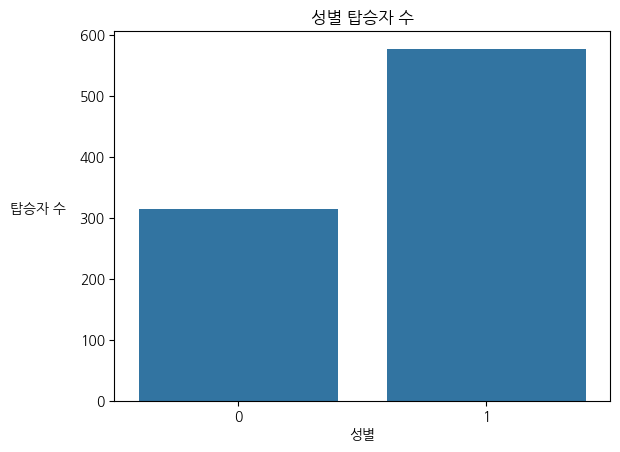

In [194]:
sns.barplot(data=b, x=b.index, y='count', color='#1f77b4')
plt.title('성별 탑승자 수')
plt.ylabel('탑승자 수', rotation = 0, labelpad=30)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.show()

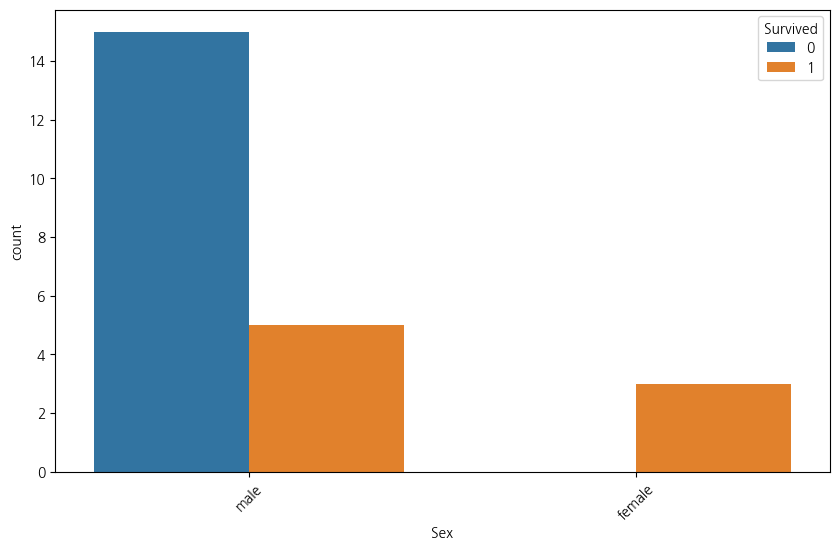

In [195]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Sex', hue = 'Survived')
plt.xticks(rotation=45)
plt.show()

# 고위측 여성은 모두 살았음

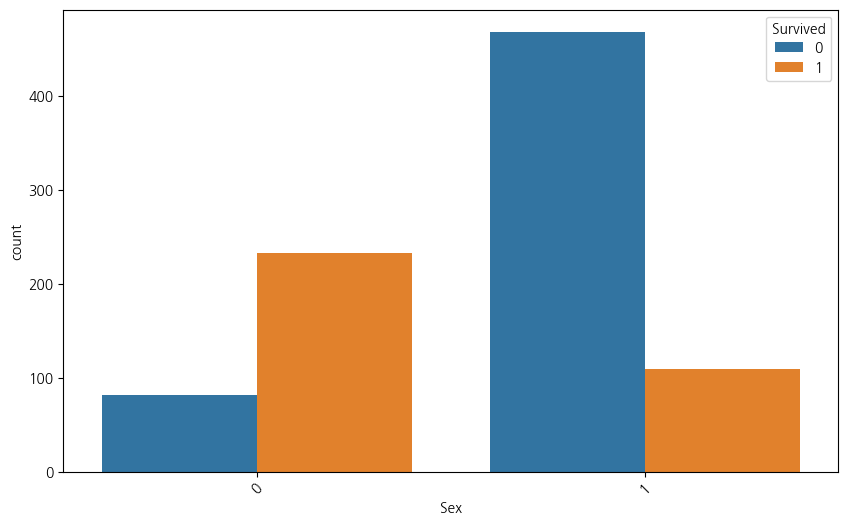

In [196]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Sex', hue = 'Survived')
plt.xticks(rotation=45)
plt.show()

# 전체 데이터에서 남성보다 여성의 생존율이 높음
# 성별은 target 변수에 매우 중요한 요소임을 짐작할 수 있음

In [197]:
result_df = filtered_df.groupby('Sex')['Fare'].mean()
result_df

# female이 male 보다 평균 요금이 높음

Sex
female    50.67640
male      35.14375
Name: Fare, dtype: float64

In [198]:
result_df = titanic_df.groupby('Sex')['Fare'].mean()
result_df

# female이 male 보다 평균 요금이 높고 사회적 지위가 높은 사람과 아닌 사람의 평균 나이가 여성은 5, 남성은 10 더 많음
# 또한, 남성

Sex
0    44.479818
1    25.523893
Name: Fare, dtype: float64

In [199]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,22.000000,1,0,523,7.2500,2,11
1,1,1,0,38.000000,1,0,596,71.2833,0,12
2,1,3,0,26.000000,0,0,669,7.9250,2,8
3,1,1,0,35.000000,1,0,49,53.1000,2,12
4,0,3,1,35.000000,0,0,472,8.0500,2,11
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2,14
887,1,1,0,19.000000,0,0,14,30.0000,2,8
888,0,3,0,29.699118,1,2,675,23.4500,2,8
889,1,1,1,26.000000,0,0,8,30.0000,0,11


In [200]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 66.3 KB


## sex 전처리 방식(onehot vs label encoding)

- 결과 : 성능이 원핫인코딩이 더 우수

In [201]:
titanic_df_sex

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Rev
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [202]:
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Ticket','Embarked','Title']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])
    return train_df
        
b_onehot = change_object(titanic_df_sex)
b_label = change_object(titanic_df_sex)

In [203]:
b_onehot = pd.get_dummies(b_onehot)
b_onehot

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_female,Sex_male
0,0,3,22.0,1,0,523,7.2500,2,11,False,True
1,1,1,38.0,1,0,596,71.2833,0,12,True,False
2,1,3,26.0,0,0,669,7.9250,2,8,True,False
3,1,1,35.0,1,0,49,53.1000,2,12,True,False
4,0,3,35.0,0,0,472,8.0500,2,11,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,101,13.0000,2,14,False,True
887,1,1,19.0,0,0,14,30.0000,2,8,True,False
888,0,3,NaN,1,2,675,23.4500,2,8,True,False
889,1,1,26.0,0,0,8,30.0000,0,11,False,True


In [204]:
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Sex']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])
    return train_df
b_label = change_object(b_label)
b_label

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,22.0,1,0,523,7.2500,2,11
1,1,1,0,38.0,1,0,596,71.2833,0,12
2,1,3,0,26.0,0,0,669,7.9250,2,8
3,1,1,0,35.0,1,0,49,53.1000,2,12
4,0,3,1,35.0,0,0,472,8.0500,2,11
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2,14
887,1,1,0,19.0,0,0,14,30.0000,2,8
888,0,3,0,NaN,1,2,675,23.4500,2,8
889,1,1,1,26.0,0,0,8,30.0000,0,11


In [205]:
b_onehot['Age'] = b_onehot['Age'].fillna(b_onehot['Age'].mean())
b_label['Age'] = b_label['Age'].fillna(b_label['Age'].mean())

In [206]:
from sklearn.model_selection import train_test_split
x_train1, x_val1, y_train1, y_val1 = train_test_split(b_onehot.drop('Survived', axis=1), 
                                                      b_onehot['Survived'],
                                                     test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(b_label.drop('Survived', axis=1), 
                                                      b_label['Survived'],
                                                     test_size=0.2, random_state=42)

In [207]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train1, y_train1)

pred_train1 = dt.predict(x_train1)
pred_val1 = dt.predict(x_val1)
from sklearn.metrics import accuracy_score
accuracy_score(y_train1,pred_train1), accuracy_score(y_val1,pred_val1)

(0.8160112359550562, 0.8044692737430168)

(0.21614898480570133, 0.1936936936936937)

In [208]:
dt = RandomForestClassifier(max_depth=3,max_samples=30, random_state=42)
dt.fit(x_train2, y_train2)

pred_train2 = dt.predict(x_train2)
pred_val2 = dt.predict(x_val2)
from sklearn.metrics import accuracy_score
accuracy_score(y_train2, pred_train2), accuracy_score(y_val2,pred_val2)

# 원핫 인코딩으로 결정

(0.8202247191011236, 0.7932960893854749)

In [214]:
from sklearn.metrics import r2_score
r2_score(y_train2, pred_train2), r2_score(y_val2,pred_val2)

(0.23409977141320437, 0.14761904761904754)

# pclass, name, sex 변수 분석 및 전처리 방법 결과

In [317]:
titanic_df[titanic_df['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
